# Стохастический градиентный и координатный спуски

Для каждого задания указано количество баллов (если они оцениваются отдельно) + 1 балл за аккуратное и полное выполнение всего задания

## Загрузка и подготовка данных

**Загрузите уже знакомый вам файл *Advertising.csv* как объект DataFrame.** 

In [1]:
#ваш код
import pandas as pd

df = pd.read_csv('Advertising.csv')

**Проверьте, есть ли в данных пропуски и, если они есть - удалите их**

In [2]:
#ваш код
df.info()
#пропусков данных нет но столбей "Unnamed: 0" не является информативным для регрессии т.к. это порядковый номер 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


**Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y(целевая переменная)** 

In [3]:
#ваш код
X = df[['TV','radio','newspaper']].values
y = df['sales'].values

## Координатный спуск (3 балла)

**Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:**

In [4]:
import numpy as np
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

**Нормализуем данные: обычно это необходимо для корректной работы алгоритма**

In [5]:
X = X / np.sqrt(np.sum(np.square(X), axis=0))

**Реализуйте алгоритм координатного спуска:** (3 балла)

Ниже приведен алгоритм:

<a href="https://ibb.co/Th3BQFn"><img src="https://i.ibb.co/DK2DBS6/zascas.jpg" alt="zascas" border="0"></a>

Примечание: 1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.

Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

In [6]:
#ваш код

def coordinate_descent(X, y, max_iter=1000, tol=1e-4):
    n_samples, n_features = X.shape
    w = np.zeros(n_features)  # Инициализация весов
    
    for iteration in range(max_iter):
        prev_w = np.copy(w)
        
        for j in range(n_features):
            # Фиксируем все переменные, кроме j-ой
            X_j = np.delete(X, j, axis=1)
            w_j = np.delete(w, j)
            
            # Вычисляем остатки
            residuals = y - np.dot(X_j, w_j)
            
            # Вычисляем коэффициент для j-ой переменной
            x_j = X[:, j]
            w[j] = np.dot(x_j, residuals) / np.dot(x_j, x_j)
            
        # Проверка на сходимость
        if np.linalg.norm(w - prev_w) < tol:
            break
    
    return w


# Выполним координатный спуск для оптимизации параметров модели
weights = coordinate_descent(X, y)
print("Optimized weights:", weights)

Optimized weights: [ 41.56239272 110.13144169  73.52855119  -0.55019976]


Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [7]:
from sklearn.linear_model import LinearRegression
 
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
 
print(model.coef_)

[ 41.56217205 110.13144155  73.52860638  -0.55006384]


Если вы все сделали верно, они должны практически совпасть!

## Стохастический градиентный спуск (6 баллов)

**Отмасштабируйте столбцы исходной матрицы *X* (которую мы не нормализовали еще!). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение** (0.5 баллов)

In [8]:
#ваш код

# восстановим Х 
X = df[['TV','radio','newspaper']].values
#Отмасштабируем столбцы исходной матрицы
X=(X-np.mean(X, axis=0))/np.std(X, axis=0)

**Добавим единичный столбец**

In [9]:
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

**Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse** (0.5 балла)

In [10]:
#ваш код

def mse_error(y_true, y_pred):
    """
    Вычисляет среднеквадратичную ошибку между реальными значениями и предсказанными значениями.

    Args:
    y_true: numpy array, массив реальных значений
    y_pred: numpy array, массив предсказанных значений

    Returns:
    mse: float, значение среднеквадратичной ошибки
    """
    # Проверка на соответствие размерности массивов
    assert len(y_true) == len(y_pred), "Размеры массивов y_true и y_pred должны совпадать"
    
    # Вычисление среднеквадратичной ошибки
    mse = np.mean((y_true - y_pred) ** 2)
    
    return mse

**Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза** (0.5 балла)

In [11]:
#ваш код
# Вычисляем среднее значение продаж
mean_sales = np.mean(y)

# Создаем массив предсказаний, используя среднее значение продаж
predicted_sales = np.full_like(y, fill_value=mean_sales)

# Вычисляем среднеквадратичную ошибку (MSE) для наивного прогноза
mse_naive = mse_error(y,predicted_sales)

print("Mean Squared Error (MSE) для наивного прогноза:", mse_naive)

Mean Squared Error (MSE) для наивного прогноза: 27.085743750000002


**Создайте функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов** (0.5 балла)

In [12]:
#ваш код
def lin_pred(X, w):
    """
    Вычисляет вектор прогнозов для линейной модели.

    Аргументы:
    X: numpy array, матрица предикторов размерности (n_samples, n_features).
    w: numpy array, вектор весов размерности (n_features,).

    Возвращает:
    y_pred: numpy array, вектор прогнозов размерности (n_samples,).
    """
    y_pred = np.dot(X, w)
    return y_pred

**Создайте функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска. (1.5 балла) 
Функция должна принимать на вход следующие аргументы:**
* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Для того, чтобы написать функцию, нужно сделать следующее:
    
*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [13]:
#ваш код
def stoch_grad_step(X, y, w, train_ind, eta):
    """
    Реализует один шаг стохастического градиентного спуска.

    Аргументы:
    X: numpy array, матрица предикторов размерности (n_samples, n_features).
    y: numpy array, вектор истинных значений размерности (n_samples,).
    w: numpy array, вектор весов размерности (n_features,).
    train_ind: int, индекс объекта обучающей выборки.
    eta: float, шаг градиентного спуска.

    Возвращает:
    w_new: numpy array, вектор обновленных весов размерности (n_features,).
    """
    # Получаем предсказание для выбранного объекта
    y_pred = np.dot(X[train_ind], w)
    # Вычисляем направление изменения
    direction = 2 * X[train_ind] * (y_pred - y[train_ind]) / len(y)
    # Обновляем веса
    w_new = w - eta * direction
    return w_new

**Создайте функцию *stochastic_gradient_descent*, для реализации стохастического градиентного спуска (2.5 балла)**

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу 

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

Алгоритм сследующий:
    
* Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создайте пустой список для фиксации ошибок
* Создайте счетчик итераций
* Реализуйте оновной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
* Верните вектор весов и вектор ошибок

In [14]:
# ваш код

def stochastic_gradient_descent(X, y, w_init, eta, max_iter, tol):
    """
    Реализует стохастический градиентный спуск.

    Аргументы:
    X: numpy array, матрица предикторов размерности (n_samples, n_features).
    y: numpy array, вектор истинных значений размерности (n_samples,).
    w_init: numpy array, начальные веса размерности (n_features,).
    eta: float, шаг градиентного спуска.
    max_iter: int, максимальное число итераций.
    tol: float, пороговое значение для расстояния между векторами весов на соседних итерациях.

    Возвращает:
    w: numpy array, вектор весов.
    errors: list, список значений среднеквадратичной ошибки на каждой итерации.
    """
    # Инициализируем расстояние между векторами весов на соседних итерациях
    dist = np.inf
    # Создаем пустой список для фиксации ошибок
    errors = []
    # Создаем счетчик итераций
    iter_count = 0
    # Выполняем цикл до выполнения критерия останова
    while dist > tol and iter_count < max_iter:
        # Выбираем случайный индекс объекта обучающей выборки
        train_ind = np.random.randint(X.shape[0])
        # Фиксируем текущую ошибку
        errors.append(mse_error(y, np.dot(X, w_init)))
        # Выполняем один шаг стохастического градиентного спуска
        w_new = stoch_grad_step(X, y, w_init, train_ind, eta)
        # Вычисляем расстояние между векторами весов на соседних итерациях
        dist = np.linalg.norm(w_new - w_init)
        # Обновляем веса
        w_init = w_new
        # Увеличиваем счетчик итераций
        iter_count += 1
    return w_init, errors

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.**

**Постройте график зависимости ошибки от номера итерации**

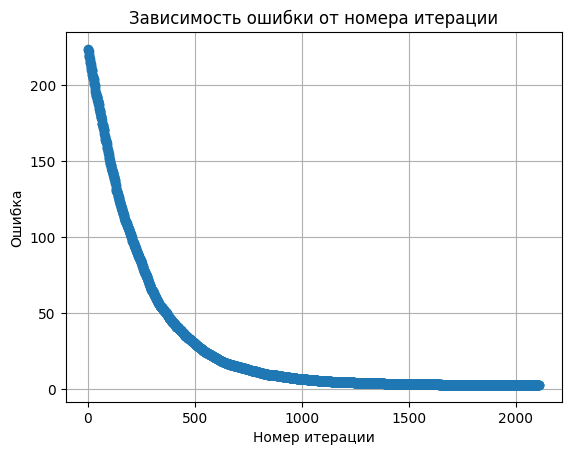

In [15]:
# ваш код
import matplotlib.pyplot as plt

np.random.seed(42)

# Параметры стохастического градиентного спуска
eta = 0.2
max_iter = 10**5
tol = 1e-5

# Начальные веса (все нули)
w_init = np.zeros(X.shape[1])

# Запуск стохастического градиентного спуска
w_final, errors = stochastic_gradient_descent(X, y.flatten(), w_init, eta, max_iter, tol)

# Построение графика зависимости ошибки от номера итерации
plt.plot(range(1, len(errors) + 1), errors, marker='o', linestyle='-')
plt.xlabel('Номер итерации')
plt.ylabel('Ошибка')
plt.title('Зависимость ошибки от номера итерации')
plt.grid(True)
plt.show()



**Выведите вектор весов, к которому сошелся метод.**

In [16]:
# ваш код

# Вывод полученных весов
print('Финальные веса модели:', w_final)

Финальные веса модели: [13.77540231  3.94401522  2.71133019  0.06526631]


**Выведите среднеквадратичную ошибку на последней итерации.**

In [17]:
# ваш код
y_pred =  lin_pred(X,w_final)
mse_sgd = mse_error(y,y_pred)
print("Mean Squared Error (MSE) для стохастического градиентного спуска:", mse_sgd)

Mean Squared Error (MSE) для стохастического градиентного спуска: 2.85503107823194


***Дополнительное задание***

в данном кейсе мы решаем задачу регрессии потому для сравнения будем использовать SGDRegressor из библиотеки sklearn

In [22]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
# восстановим Х 
X = df[['TV','radio','newspaper']].values
reg = make_pipeline(StandardScaler(),
                    SGDRegressor(max_iter=1000, tol=1e-3))
reg.fit(X, y)

y_pred_sklearn = reg.predict(X)



***Оцените качество с помощью среднеквадратичной ошибки и сравните результат с результатом алгоритма, реализованного вами самостоятельно.***

In [23]:
mse_sgd_sklearn = mean_squared_error(y,y_pred_sklearn)
print("Mean Squared Error (MSE) для стохастического градиентного спуска из библиотеки:", mse_sgd_sklearn)

# Ошибка самостоятельбно реализованного стохастического градиентного спуска значительно ниже чем наивновного предсказания,
# но библиотечний класс несколько лучше самостоятельно реализованного SGD при правильном подборе шага градиентного спуска

Mean Squared Error (MSE) для стохастического градиентного спуска из библиотеки: 2.7843738129498417


***В одном из предыдущих модулей качество решения задачи регрессии оценивалось с помощью ещё одной метрики. Найдите её реализацию в библиотеке sklearn и оцените качество полученной модели.***

In [24]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error

mae_sgd_sklearn = mean_absolute_error(y,y_pred_sklearn)
mae_sgd = mean_absolute_error(y,y_pred)

print("Mean absolute  Error (MAE) для стохастического градиентного спуска из библиотеки:", round(mae_sgd_sklearn,3))
print("Mean absolute  Error (MAE) для стохастического градиентного спуска:", round(mae_sgd_sklearn,3))

mape_sgd_sklearn = mean_absolute_percentage_error(y,y_pred_sklearn)
mape_sgd = mean_absolute_percentage_error(y,y_pred)

print("Mean absolute percentage error (MAPE) для стохастического градиентного спуска из библиотеки:", round(mape_sgd_sklearn*100,2))
print("Mean absolute percentage error (MAPE) для стохастического градиентного спуска:", round(mape_sgd_sklearn*100,2))


Mean absolute  Error (MAE) для стохастического градиентного спуска из библиотеки: 1.253
Mean absolute  Error (MAE) для стохастического градиентного спуска: 1.253
Mean absolute percentage error (MAPE) для стохастического градиентного спуска из библиотеки: 13.86
Mean absolute percentage error (MAPE) для стохастического градиентного спуска: 13.86


***Выводы***

полученная модель по показателям практически не отличается от библиотечной реализации.